In [ ]:
#BD9 (CEREALES)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Carga el conjunto de datos
df = pd.read_csv("cereal.csv")

# Calcula la media, varianza y desviación estándar de las variables numéricas
mean_calories = df['calories'].mean()
mean_protein = df['protein'].mean()
mean_fat = df['fat'].mean()
# Calcula más estadísticas para las demás variables...

var_calories = df['calories'].var()
var_protein = df['protein'].var()
var_fat = df['fat'].var()
# Calcula más varianzas para las demás variables...

std_calories = df['calories'].std()
std_protein = df['protein'].std()
std_fat = df['fat'].std()
# Calcula más desviaciones estándar para las demás variables...

# Crea un diagrama de Pareto para un porcentaje específico
percentage = 80  # Porcentaje a considerar
sorted_vals = df['mfr'].value_counts().sort_values(ascending=False)
cumulative_perc = (sorted_vals / sorted_vals.sum()).cumsum()
pareto_df = pd.DataFrame({'Manufacturer': sorted_vals.index, 'Count': sorted_vals.values, 'Cumulative Percentage': cumulative_perc.values})

# Filtra el porcentaje especificado en el diagrama de Pareto
filtered_pareto_df = pareto_df[pareto_df['Cumulative Percentage'] <= percentage]



# Realiza pruebas estadísticas (p. ej., prueba t, ANOVA, etc.)
mfr_groups = df.groupby('mfr')

# Realiza una prueba t para comparar las características nutricionales entre fabricantes
manufacturer_list = df['mfr'].unique()
t_results = []

for i in range(len(manufacturer_list)):
    for j in range(i+1, len(manufacturer_list)):
        manufacturer1 = manufacturer_list[i]
        manufacturer2 = manufacturer_list[j]
        group1 = mfr_groups.get_group(manufacturer1)
        group2 = mfr_groups.get_group(manufacturer2)
        t_stat, p_value = stats.ttest_ind(group1['calories'], group2['calories'])
        t_results.append({'Manufacturer 1': manufacturer1, 'Manufacturer 2': manufacturer2, 'T-Stat': t_stat, 'P-Value': p_value})

t_results_df = pd.DataFrame(t_results)

# Calcula la matriz de correlación
correlation_matrix = df[['calories', 'protein', 'fat', 'sodium', 'fiber']].corr()

# Realiza una regresión lineal
x = df['calories']
y = df['protein']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Visualización de resultados
plt.figure(figsize=(12, 12))

# Histograma
plt.subplot(2, 2, 1)
sns.histplot(df['calories'], kde=True)
plt.title('Histograma de Calorías')

# Diagrama de Pareto
plt.subplot(2, 2, 2)
sns.barplot(data=filtered_pareto_df, x='Manufacturer', y='Count')
plt.title('Diagrama de Pareto')

# Prueba t
plt.subplot(2, 2, 3)
sns.barplot(data=t_results_df, x='Manufacturer 1', y='P-Value', hue='Manufacturer 2')
plt.title('Prueba t: Comparación de Calorías por Fabricante')

# Matriz de correlación
plt.subplot(2, 2, 4)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')

# Gráfico de dispersión
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='calories', y='protein')
sns.lineplot(x, intercept + slope*x, color='red', label='Regresión Lineal')
plt.title('Gráfico de Dispersión: Calorías vs. Proteína')

plt.tight_layout()
plt.show()


In [ ]:
#BD9(CEREALES)
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import boxcox

# Seleccionar la columna de interés para la transformación
column_name = 'calories'

# Obtener los datos sin valores nulos
data = df[column_name].dropna()

# Aplicar la transformación de Box-Cox
transformed_data, _ = stats.boxcox(data)

# Generar el gráfico de la distribución normalizada
plt.figure(figsize=(8, 6))
plt.hist(transformed_data, bins=20)
plt.xlabel('Transformed Data')
plt.ylabel('Frequency')
plt.title('Normalized Distribution of {}'.format(column_name))
plt.show()


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

In [ ]:
#BD10(CAMARAS)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import binom_test,ttest_ind, chi2_contingency, pearsonr,norm

# Cargar los datos del documento de las cámaras
df = pd.read_csv('camera_dataset.csv')
df=df.dropna()

# Histograma
plt.hist(df['Zoom wide (W)'], bins=10)
plt.xlabel('Zoom wide (W)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Zoom wide (W)')
plt.show()

# Media, varianza y desviación estándar
media = df['Zoom wide (W)'].mean()
varianza = df['Zoom wide (W)'].var()
desviacion_estandar = df['Zoom wide (W)'].std()

print('Media: ', media)
print('Varianza:',varianza)
print('Desviacion estandar:', desviacion_estandar)

# Diagrama de Pareto
frecuencia_acumulada = df['Release date'].value_counts().cumsum() / len(df)

fig, ax1 = plt.subplots()
ax1.bar(frecuencia_acumulada.index, frecuencia_acumulada.values, color='blue')
ax1.set_ylabel('Frecuencia Acumulada')

ax2 = ax1.twinx()
ax2.plot(frecuencia_acumulada.index, frecuencia_acumulada.values.cumsum(), color='red', marker='o')
ax2.set_ylabel('Frecuencia Acumulada Acumulada')

plt.title('Diagrama de Pareto')
plt.show()


# Realizar transformación de binomial a normal en la columna 'Weight (inc. batteries)'
n = df['Weight (inc. batteries)'].max()
p = df['Weight (inc. batteries)'].mean() / n
transformed_data = norm.ppf(df['Weight (inc. batteries)'] / n)

# Eliminar los valores infinitos de los datos transformados
transformed_data = transformed_data[np.isfinite(transformed_data)]

# Histograma de los datos originales y transformados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Weight (inc. batteries)'].dropna(), bins=10)
plt.xlabel('Weight (inc. batteries) (Original)')
plt.ylabel('Frequency')
plt.title('Histogram of Original Data')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=10)
plt.xlabel('Weight (inc. batteries) (Transformed)')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed Data')

plt.tight_layout()
plt.show()

# Prueba t entre el valor FOB y el peso
t_statistic, p_value = stats.ttest_ind(df['Weight (inc. batteries)'].dropna(), df['Price'].dropna())
print('T-statistic:', t_statistic)
print('p-value:', p_value)









In [ ]:
#BD10(CAMARAS)
# Prueba de correlación entre el precio y el peso
corr_coef, p_value = pearsonr(df['Weight (inc. batteries)'], df['Price'])
print('Coeficiente de correlación:', corr_coef)
print('Valor p:', p_value)

# Regresión lineal entre el valor FOB y el peso
slope, intercept, r_value, p_value, std_err = linregress(df['Weight (inc. batteries)'], df['Price'])

# Imprimir resultados de la regresión lineal
print('Coeficiente de regresión:', slope)
print('Intercepto:', intercept)
print('Coeficiente de correlación:', r_value)
print('Valor p:', p_value)
print('Error estándar:', std_err)

# Gráfico de regresión lineal
plt.figure(figsize=(8, 6))
sns.regplot(x='Weight (inc. batteries)', y='Price', data=df)
plt.xlabel('Peso (inc. baterías)')
plt.ylabel('Precio')
plt.title('Regresión Lineal: Peso vs Precio')
plt.show()

In [ ]:
------------------------------------------------------------------------------------------------------------------------

In [ ]:
#BD4(VICTIMAS DE ACCIDENTES DE TRANSITO POR PROVINCIA)  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# 1. Importar bibliotecas

# 2. Cargar los datos
data = pd.read_excel("Victima Accidentes de Tránsito en Panama (provincia).xlsx")

# 3. Histograma de la distribución de clases de víctimas
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Clase Victima")
plt.title("Distribución de Clases de Víctimas")
plt.xlabel("Clase de Víctima")
plt.ylabel("Frecuencia")
plt.show()

# 4. Media, varianza y desviación estándar de la edad de las víctimas
mean_age = data["Edad"].mean()
var_age = data["Edad"].var()
std_age = data["Edad"].std()

print("Media de Edad:", mean_age)
print("Varianza de Edad:", var_age)
print("Desviación Estándar de Edad:", std_age)

# 5. Diagrama de Pareto de la distribución de las condiciones de las víctimas
condicion_counts = data["Condicion Victima"].value_counts()
cumulative_perc = np.cumsum(condicion_counts) / condicion_counts.sum()

plt.figure(figsize=(10, 6))
plt.bar(condicion_counts.index, condicion_counts)
plt.plot(condicion_counts.index, cumulative_perc, color="red", marker="o")
plt.title("Diagrama de Pareto - Condiciones de las Víctimas")
plt.xlabel("Condición de la Víctima")
plt.ylabel("Frecuencia / Porcentaje Acumulado")
plt.xticks(rotation=30)
plt.show()

# 6. Transformación binomial a normal
transformed_data = np.sqrt(data["Edad"])


sns.histplot(transformed_data, kde=True)
plt.title("Distribución Transformada (Raíz Cuadrada)")
plt.xlabel("Edad Transformada")
plt.ylabel("Frecuencia")
plt.show()




In [ ]:
#BD4(VICTIMAS DE ACCIDENTES DE TRANSITO POR PROVINCIA) 
# Codificar variables categóricas
data_encoded = data.copy()
label_encoder = LabelEncoder()
data_encoded["Clase Victima"] = label_encoder.fit_transform(data_encoded["Clase Victima"])
data_encoded["Sexo"] = label_encoder.fit_transform(data_encoded["Sexo"].astype(str))

# 8. Prueba chi-cuadrado para analizar la relación entre la clase de víctima y el sexo
observed = pd.crosstab(data_encoded["Clase Victima"], data_encoded["Sexo"])

chi2, p_value, _, _ = stats.chi2_contingency(observed)

print("Prueba chi-cuadrado - Estadística chi-cuadrado:", chi2)
print("Prueba chi-cuadrado - Valor p:", p_value)

# Gráfico de barras
labels = observed.index
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, observed[0], width, label='Hombre')
ax.bar(x + width/2, observed[1], width, label='Mujer')

ax.set_xlabel('Clase de Víctima')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Clase de Víctima por Sexo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()




In [ ]:
#BD4(VICTIMAS DE ACCIDENTES DE TRANSITO POR PROVINCIA) 
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Codificar la variable "Clase Victima"
data["Clase Victima"] = label_encoder.fit_transform(data["Clase Victima"].astype(str))

# Codificar la variable "Sexo"
data["Sexo"] = label_encoder.fit_transform(data["Sexo"].astype(str))

# Regresión lineal para analizar la relación entre la clase de víctima y el sexo
X = data[["Clase Victima"]]
y = data["Sexo"]

regression_model = LinearRegression()
regression_model.fit(X, y)

coefficients = regression_model.coef_
intercept = regression_model.intercept_

print("Coeficientes:", coefficients)
print("Término independiente:", intercept)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la dispersión de los puntos
sns.scatterplot(data=data, x="Clase Victima", y="Sexo", ax=ax)

# Graficar la línea de regresión lineal
x_values = np.linspace(data["Clase Victima"].min(), data["Clase Victima"].max(), 100)
y_values = intercept + coefficients * x_values
sns.lineplot(x=x_values, y=y_values, color="red", ax=ax)

# Establecer etiquetas y título
ax.set_xlabel("Clase Victima")
ax.set_ylabel("Sexo")
ax.set_title("Regresión Lineal")

# Mostrar la gráfica
plt.show()

In [ ]:
---------------------------------------------------------------------------------------------------------------------------

In [ ]:
#BD6(Indicadores Económicos-Clasificación de Importaciones según el Uso o Destino Económico de los Bienes)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest, shapiro, ttest_ind
from sklearn.linear_model import LinearRegression

# Cargar los datos desde un archivo CSV o Excel
data = pd.read_excel('@Indicadores Económicos-Clasificación de Importaciones según el Uso o Destino Económico de los Bienes .xlsx')

# Histograma de medidas de importación (por ejemplo, peso neto)
plt.hist(data['Valores de medidas'], bins=10, edgecolor='black')
plt.xlabel('Medida de importación')
plt.ylabel('Frecuencia')
plt.title('Histograma de medidas de importación')
plt.show()

# Media, varianza y desviación estándar de las medidas de importación
media = data['Valores de medidas'].mean()
varianza = data['Valores de medidas'].var()
desviacion_estandar = data['Valores de medidas'].std()
print(f'Media: {media}')
print(f'Varianza: {varianza}')
print(f'Desviación Estándar: {desviacion_estandar}')

# Diagrama de Pareto para un porcentaje (por ejemplo, 80%)
total_valores = len(data)
porcentaje = 0.8
data_sorted = data.sort_values(by='Valores de medidas', ascending=False)
data_sorted['cumulative_percentage'] = data_sorted['Valores de medidas'].cumsum() / data_sorted['Valores de medidas'].sum()
data_pareto = data_sorted[data_sorted['cumulative_percentage'] <= porcentaje]
plt.bar(data_pareto['Nombres de medidas'], data_pareto['Valores de medidas'])
plt.xlabel('Medida de importación')
plt.ylabel('Valor')
plt.title(f'Diagrama de Pareto para el {porcentaje * 100}% de las medidas de importación')
plt.xticks(rotation=45, ha='right')
plt.show()



In [ ]:
#BD6(Indicadores Económicos-Clasificación de Importaciones según el Uso o Destino Económico de los Bienes)
data=data.dropna()
# Prueba de normalidad (para comprobar si los datos se distribuyen normalmente)
stat, p = normaltest(data['Valores de medidas'])
if p < 0.05:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")


# Transformación de datos a una distribución normal
transformed_data = np.log(data['Valores de medidas'])  # Ejemplo: aplicar logaritmo natural
plt.hist(transformed_data, bins=10, edgecolor='black')
plt.xlabel('Datos transformados')
plt.ylabel('Frecuencia')
plt.title('Distribución transformada a normal')
plt.show()

# Prueba t de Student para comparar medidas de importación entre dos trimestres (por ejemplo, Q1 y Q2)
trimestre_Q1 = data[data['Trimestre'] == 'Q1']['Valores de medidas']
trimestre_Q2 = data[data['Trimestre'] == 'Q2']['Valores de medidas']
stat, p = ttest_ind(trimestre_Q1, trimestre_Q2, equal_var=False)
if p < 0.05:
    print("Hay una diferencia significativa en las medidas de importación entre Q1 y Q2.")
else:
    print("No hay una diferencia significativa en las medidas de importación entre Q1 y Q2.")


# Regresión lineal para analizar la relación entre dos variables (por ejemplo, peso neto y valor FOB)
peso_neto = data['Nombres de medidas'] == 'Peso neto'
valor_FOB = data['Nombres de medidas'] == 'Valor FOB'
X = data[peso_neto]['Valores de medidas'].values.reshape(-1, 1)
y = data[valor_FOB]['Valores de medidas'].values
regresion = LinearRegression()
regresion.fit(X, y)
coeficiente = regresion.coef_[0]
intercepto = regresion.intercept_
print(f'Coeficiente: {coeficiente}')
print(f'Intercepto: {intercepto}')

# Gráfico de la regresión lineal
plt.scatter(X, y, color='b', label='Datos')
plt.plot(X, regresion.predict(X), color='r', label='Regresión lineal')
plt.xlabel('Peso neto')
plt.ylabel('Valor FOB')
plt.title('Regresión lineal: Peso neto vs. Valor FOB')
plt.legend()
plt.show()


In [ ]:
---------------------------------------------------------------------------------------------------------------------------

In [ ]:
#BD5 (Importaciones por zona franca)
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos en un DataFrame
df = pd.read_excel('@Importaciones por zona franca (1).xlsx')  
# Histograma de las importaciones por zona franca
df['Zonas Francas '].value_counts().plot(kind='bar')
plt.xlabel('Zona Franca')
plt.ylabel('Cantidad de Importaciones')
plt.title('Importaciones por Zona Franca')
plt.show()

# Media, varianza y desviación estándar de las importaciones por zona franca
importaciones_por_zona = df.groupby('Zonas Francas ')['Valor CIF'].sum()
media = importaciones_por_zona.mean()
varianza = importaciones_por_zona.var()
desviacion_estandar = importaciones_por_zona.std()
print('Media:', media)
print('Varianza:', varianza)
print('Desviación Estándar:', desviacion_estandar)



In [ ]:
#BD5 (Importaciones por zona franca)
# Transformación de la distribución binomial a normal
import scipy.stats as stats
import statsmodels.api as sm

# Seleccionar la columna a analizar
columna = df['Valor CIF']

# Histogram
plt.hist(columna, bins='auto', alpha=0.7, density=True)
plt.xlabel('Valor CIF')
plt.ylabel('Densidad')
plt.title('Distribución de Valor CIF')

# Q-Q plot
sm.qqplot(columna, line='s')
plt.xlabel('Cuántiles teóricos')
plt.ylabel('Cuántiles de Valor CIF')
plt.title('Gráfico Q-Q')

plt.show()

In [ ]:
#BD5 (Importaciones por zona franca)
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_excel('@Importaciones por zona franca (1).xlsx')

# Limpiar los datos eliminando filas con valores nulos o vacíos en 'Valor CIF' y 'Pais'
df = df.dropna(subset=['Valor CIF', 'País '])

# Convertir la columna 'Pais' en variables dummy
dummies = pd.get_dummies(df['País '], prefix='País ')

# Combinar las variables dummy con el DataFrame original
df = pd.concat([df, dummies], axis=1)

# Regresión lineal con 'Valor CIF' y variables dummy de 'Pais'
X = df[['Valor CIF'] + list(dummies.columns)]
y = df['Valor CIF']

X = sm.add_constant(X)  # Agregar una columna de unos para el término de intercepto
model = sm.OLS(y, X)
results = model.fit()

# Gráfico de dispersión y línea de regresión
plt.scatter(df['Valor CIF'], y)
plt.plot(df['Valor CIF'], results.predict(X), color='red', linewidth=2)
plt.xlabel('Valor CIF')
plt.ylabel('Valor FIB')
plt.title('Regresión lineal entre Valor CIF y Valor FIB')
plt.show()

print(results.summary())

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


# Prueba t para comparar las importaciones entre dos grupos
grupo1 = df[df['Zonas Francas '] == 'Zona Franca 1']['Valor CIF']
grupo2 = df[df['Zonas Francas '] == 'Zona Franca 2']['Valor CIF']

t_statistic, p_value = stats.ttest_ind(grupo1, grupo2)
print('T-statistic:', t_statistic)
print('P-value:', p_value)

# Prueba de ANOVA para comparar las importaciones entre múltiples grupos
grupos = df['Zonas Francas '].unique()
data_grupos = [df[df['Zonas Francas '] == grupo]['Valor CIF'] for grupo in grupos]

f_statistic, p_value_anova = stats.f_oneway(*data_grupos)
print('F-statistic:', f_statistic)
print('P-value (ANOVA):', p_value_anova)

# Gráfico de barras para mostrar las importaciones promedio por grupo de Zona Franca
promedios_zonafranca = df.groupby('Zonas Francas ')['Valor CIF'].mean()

promedios_zonafranca.plot(kind='bar')
plt.xlabel('Zona Franca')
plt.ylabel('Importaciones Promedio')
plt.title('Importaciones Promedio por Zona Franca')

plt.show()


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

In [ ]:
#BD7(PIB anual por categoria economica)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binom, norm, linregress

# Leer el archivo de datos
df = pd.read_excel('PIB anual por categoria economica (1).xlsx') 
df=df.dropna()

# Convertir la columna "Codcategoria" a cadena
df['Codcategoria'] = df['Codcategoria'].astype(str)
# Histograma de Codcategoria
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Codcategoria', bins=10)
plt.title('Histograma de Codcategoria')
plt.xlabel('Codcategoria')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Media, varianza y desviación estándar del Valor Corriente
media = df['Valor Corriente'].mean()
varianza = df['Valor Corriente'].var()
desviacion_estandar = df['Valor Corriente'].std()
print(f"Media: {media}\nVarianza: {varianza}\nDesviación Estándar: {desviacion_estandar}\n")

# Diagrama de Pareto (porcentaje)
df_sorted = df.sort_values('Valor Corriente', ascending=False)
df_sorted['acumulado_porcentaje'] = df_sorted['Valor Corriente'].cumsum() / df_sorted['Valor Corriente'].sum()

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Categorías'], df_sorted['Valor Corriente'], color='b')
plt.plot(df_sorted['Categorías'], df_sorted['acumulado_porcentaje'], color='r', marker='o')
plt.title('Diagrama de Pareto (porcentaje)')
plt.xlabel('Categorías')
plt.ylabel('Valor Corriente')
plt.xticks(rotation=90)
plt.legend(['Porcentaje acumulado', 'Valor Corriente'])
plt.show()


# Regresión lineal
x = df['Año']
y = df['Valor Corriente']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, intercept + slope * x, 'r', label='Ajuste lineal')
plt.title('Regresión lineal')
plt.xlabel('Año')
plt.ylabel('Valor Corriente')
plt.legend()
plt.show()

print(f"Regresión lineal: \nPendiente: {slope}\nIntercepto: {intercept}\nCoeficiente de correlación: {r_value}\n")


In [ ]:
#BD7(PIB anual por categoria economica)
from scipy.stats import norm, chi2_contingency

# Aproximación de los datos a una distribución normal
data = df['Valor Corriente']  # Columna con tus datos

mu = data.mean()  # Media de los datos
sigma = data.std()  # Desviación estándar de los datos
x = np.linspace(data.min(), data.max(), 100)
data_pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=10, density=True, alpha=0.5, label='Datos')
plt.plot(x, data_pdf, 'r--', label='Distribución Normal')
plt.title('Aproximación de los Datos a una Distribución Normal')
plt.xlabel('Valor Corriente')
plt.ylabel('Densidad')
plt.legend()
plt.show()

#  Calcular frecuencias de las categorías
frequencies = df['Categorías'].value_counts()

# Prueba estadística de Chi-cuadrado
observed = pd.DataFrame({'Frecuencia observada': frequencies})

expected = len(df) / len(frequencies)  # Frecuencia esperada igualmente distribuida

chi2, p_value, _, _ = chi2_contingency(observed)

print(f"\nPrueba estadística de Chi-cuadrado:\nEstadístico Chi2: {chi2}\nValor p: {p_value}\n")


# Gráfico de barras de las frecuencias observadas y esperadas
plt.figure(figsize=(10, 6))
x = np.arange(len(frequencies))
width = 0.35
plt.bar(x, frequencies, width, label='Frecuencia observada')
plt.axhline(expected, color='r', linestyle='--', label='Frecuencia esperada')
plt.xticks(x, frequencies.index)
plt.title('Frecuencias observadas vs. esperadas')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()



In [ ]:
----------------------------------------------------------------------------------------------------------------------------

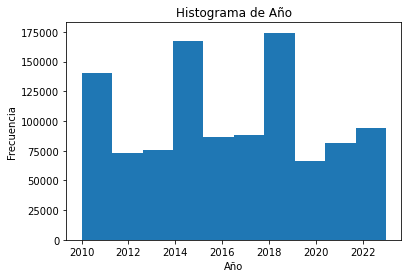

Media: 21594.165879407767
Varianza: 364856050731.78394
Desviación estándar: 604033.1536693858


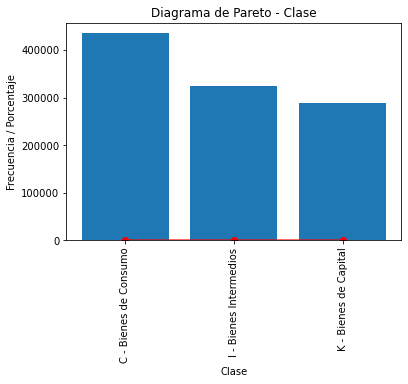

In [32]:
#BD8(Importaciones anuales)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde un archivo CSV
data = pd.read_excel('Trimestres y Meses_IE_T_IMPORTACIONES_ANUALES_data (1).xlsx')
# Histograma
plt.hist(data['Año'], bins=10)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Histograma de Año')
plt.show()

# Media, varianza y desviación estándar
mean = data['Peso bruto'].mean()
variance = data['Peso bruto'].var()
std_deviation = data['Peso bruto'].std()
print('Media:', mean)
print('Varianza:', variance)
print('Desviación estándar:', std_deviation)

# Diagrama de Pareto
pareto_data = data['Clase'].value_counts().sort_values(ascending=False)
pareto_percentage = pareto_data.cumsum() / pareto_data.sum()

plt.bar(pareto_data.index, pareto_data)
plt.plot(pareto_data.index, pareto_percentage, color='r', marker='o')
plt.xlabel('Clase')
plt.ylabel('Frecuencia / Porcentaje')
plt.title('Diagrama de Pareto - Clase')
plt.xticks(rotation=90)
plt.show()

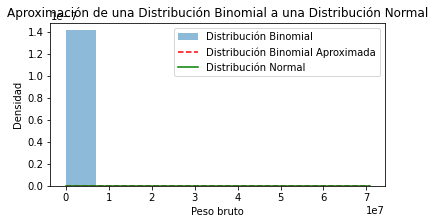

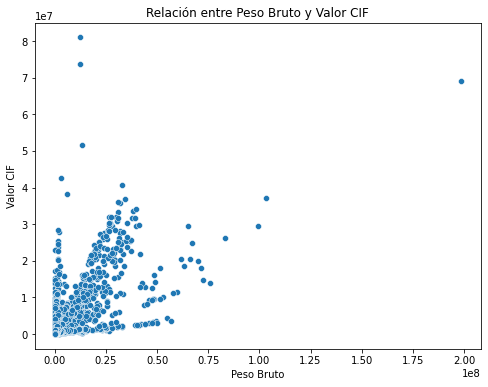

In [33]:
#BD8(Importaciones anuales)
from scipy.stats import binom, norm
import numpy as np

# Obtener la columna "Peso bruto" de tus datos
binomial_data = data['Valor FOB']

# Calcular la media y la desviación estándar de los datos
binomial_mean = binomial_data.mean()
binomial_std = binomial_data.std()

# Parámetros de la distribución binomial
n = len(binomial_data)  # Número de ensayos
p = binomial_mean / binomial_std**2  # Probabilidad de éxito

# Aproximación de la distribución binomial a la distribución normal
normal_mean = n * p
normal_std = np.sqrt(n * p * (1 - p))
x = np.linspace(binomial_data.min(), binomial_data.max(), 100)
binomial_pdf = binom.pmf(x, n, p)
normal_pdf = norm.pdf(x, normal_mean, normal_std)

# Graficar la distribución binomial y la distribución normal
plt.figure(figsize=(6, 3))
plt.hist(binomial_data, bins=10, density=True, alpha=0.5, label='Distribución Binomial')
plt.plot(x, binomial_pdf, 'r--', label='Distribución Binomial Aproximada')
plt.plot(x, normal_pdf, 'g-', label='Distribución Normal')
plt.title('Aproximación de una Distribución Binomial a una Distribución Normal')
plt.xlabel('Peso bruto')
plt.ylabel('Densidad')
plt.axis('auto')
plt.legend()
plt.show()

# Crear un gráfico de dispersión para visualizar la relación entre el peso bruto y Valor CIF
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Peso bruto', y='Valor CIF')
plt.title('Relación entre Peso Bruto y Valor CIF')
plt.xlabel('Peso Bruto')
plt.ylabel('Valor CIF')
plt.show()

In [42]:
#BD8(Importaciones anuales)
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency

# Convertir los datos a tipo numérico
peso_neto = pd.to_numeric(data['Peso neto'], errors='coerce')
peso_bruto = pd.to_numeric(data['Peso bruto'], errors='coerce')

# Eliminar valores nulos y reindexar
peso_neto = peso_neto.dropna().reset_index(drop=True)
peso_bruto = peso_bruto.dropna().reset_index(drop=True)

# Prueba t de Student
t_statistic, p_value = ttest_ind(peso_neto, peso_bruto)
print('Prueba t de Student:')
print('Estadística t:', t_statistic)
print('Valor p:', p_value)



Prueba t de Student:
Estadística t: -0.2659230163636165
Valor p: 0.7902985247554513


Coeficientes:
Peso neto : -0.08388370342593596
Peso bruto : 0.5219135444533894
Intercepto: 27697.88911138851


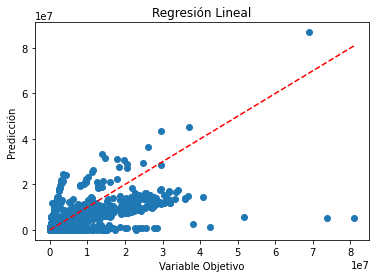

In [46]:
#BD8(Importaciones anuales)
import pandas as pd
from sklearn.linear_model import LinearRegression

data=data.dropna()
# Seleccionar las variables predictoras y la variable objetivo
X = data[['Peso neto', 'Peso bruto']]  # Variables predictoras
y = data['Valor CIF']  # Variable objetivo

# Crear el modelo de regresión lineal
regression_model = LinearRegression()

# Ajustar el modelo a los datos
regression_model.fit(X, y)

# Obtener los coeficientes de la regresión
coefficients = regression_model.coef_
intercept = regression_model.intercept_

# Imprimir los coeficientes
print('Coeficientes:')
for feature, coef in zip(X.columns, coefficients):
    print(feature, ':', coef)
print('Intercepto:', intercept)

# Realizar predicciones
y_pred = regression_model.predict(X)

# Graficar los resultados
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Variable Objetivo')
plt.ylabel('Predicción')
plt.title('Regresión Lineal')
plt.show()

In [ ]:
----------------------------------------------------------------------------------------------------------------------------

Material_Calle   Evento                  
Asfalto          Vuelco (caída en cuneta)    131
                 Colisión                    130
                 Atropello                   125
                 Colisión y vuelco           115
                 Caída de persona o cosa     108
                 Colisión y atropello         80
                 Atropello y fuga             53
                 Atropello y colisión         36
                 Colisión con objeto fijo     32
                 Atropello y vuelco           28
                 Otros                        22
Concreto         Colisión                    114
                 Atropello                   101
                 Vuelco (caída en cuneta)     94
                 Colisión y vuelco            68
                 Caída de persona o cosa      59
                 Colisión y atropello         37
                 Colisión con objeto fijo     29
                 Atropello y colisión         21
                 Atropello 

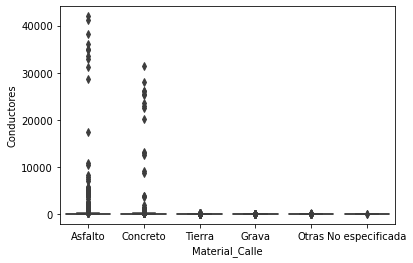

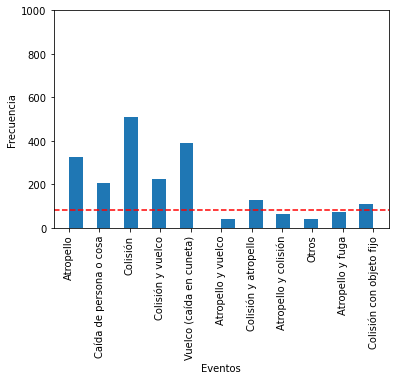

Media: 468.60095011876484
Varianza: 9807591.326424915
Desviación estándar: 3131.7074139237393


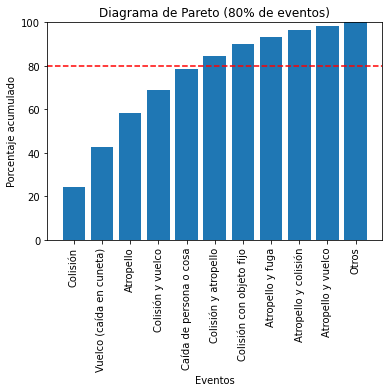

In [51]:
#BD1(Accidentes automovilísticos (conductores)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm
from sklearn.linear_model import LinearRegression

# Cargar los datos desde un archivo Excel
data = pd.read_excel('@Accidentes automovilísticos (conductores).xlsx')

# Eliminar las filas con valores nulos
data = data.dropna()

# Eventos más frecuentes dependiendo del material de la calle
eventos_por_material = data.groupby('Material_Calle')['Evento'].value_counts()
print(eventos_por_material)

# Relación entre el material de la calle y la gravedad de los accidentes
sns.boxplot(x='Material_Calle', y='Conductores', data=data)
plt.show()

# Histograma de la variable 'Conductores'
plt.hist(data['Evento'], bins='auto')
plt.xlabel('Eventos')
plt.ylabel('Frecuencia')
plt.xticks(rotation='vertical')  # Rotación vertical de las etiquetas del eje x
plt.ylim([0, 1000])
plt.axhline(y=porcentaje, color='r', linestyle='--')
plt.show()

# Media, varianza y desviación estándar de la variable 'Conductores'
media = data['Conductores'].mean()
varianza = data['Conductores'].var()
desviacion_estandar = data['Conductores'].std()
print("Media:", media)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion_estandar)

# Diagrama de Pareto para un porcentaje específico de eventos
porcentaje = 80
eventos_total = data['Evento'].value_counts().sort_values(ascending=False)
eventos_cumulativos = eventos_total.cumsum() / eventos_total.sum() * 100

plt.bar(eventos_cumulativos.index, eventos_cumulativos.values)
plt.ylabel('Porcentaje acumulado')
plt.xlabel('Eventos')
plt.title(f'Diagrama de Pareto ({porcentaje}% de eventos)')
plt.xticks(rotation=90)
plt.ylim([0, 100])
plt.axhline(y=porcentaje, color='r', linestyle='--')
plt.show()



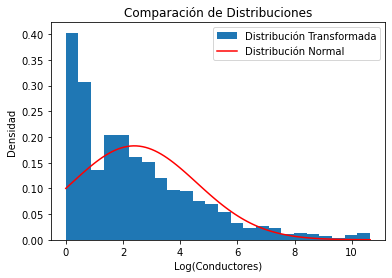

Coeficientes: [6.81384024e+15 6.81384024e+15 6.81384024e+15 6.81384024e+15
 6.81384024e+15 6.81384024e+15]
Intercept: -6813840236124463.0
Coeficiente de determinación (R^2): 0.010352758592800604


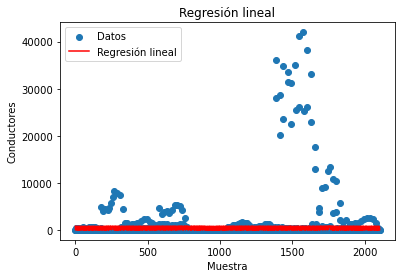

In [58]:
#BD1(Accidentes automovilísticos (conductores)
# Aproximación de la distribución binomial a una distribución normal

plt.hist(data['Conductores_transformed'], bins='auto', density=True, label='Distribución Transformada')

# Graficar la distribución normal superpuesta
x_normal = np.linspace(data['Conductores_transformed'].min(), data['Conductores_transformed'].max(), 100)
y_normal = norm.pdf(x_normal, np.mean(data['Conductores_transformed']), np.std(data['Conductores_transformed']))
plt.plot(x_normal, y_normal, 'r', label='Distribución Normal')

plt.xlabel('Log(Conductores)')
plt.ylabel('Densidad')
plt.title('Comparación de Distribuciones')
plt.legend()
plt.show()

# Regresión lineal
X = data[['Material_Calle']]
y = data['Conductores']

# Transformar las variables categóricas en variables dummy
X_encoded = pd.get_dummies(X)

# Crear el modelo de regresión lineal y ajustarlo a los datos
regression_model = LinearRegression()
regression_model.fit(X_encoded, y)

# Obtener los coeficientes y el coeficiente de determinación (R^2)
coefficients = regression_model.coef_
intercept = regression_model.intercept_
r_squared = regression_model.score(X_encoded, y)

print("Coeficientes:", coefficients)
print("Intercept:", intercept)
print("Coeficiente de determinación (R^2):", r_squared)

# Crear puntos para trazar la línea de regresión
x_values = np.arange(len(X_encoded))
y_values = regression_model.predict(X_encoded)

# Graficar los puntos de datos y la línea de regresión
plt.scatter(x_values, y, label='Datos')
plt.plot(x_values, y_values, color='red', label='Regresión lineal')
plt.xlabel('Muestra')
plt.ylabel('Conductores')
plt.title('Regresión lineal')
plt.legend()
plt.show()

In [66]:
#BD1(Accidentes automovilísticos (conductores)
from scipy import stats
# Aplicar one-hot encoding a las columnas categóricas
data_encoded = pd.get_dummies(data[['Provincia ', 'Material_Calle']])

# Realizar prueba chi-cuadrado de independencia
chi2_stat, p_valor, grados_libertad, _ = stats.chi2_contingency(data_encoded)
print("Prueba chi-cuadrado de independencia:")
print("Estadístico chi-cuadrado:", chi2_stat)
print("Valor p:", p_valor)
print("Grados de libertad:", grados_libertad)


Prueba chi-cuadrado de independencia:
Estadístico chi-cuadrado: 35785.0
Valor p: 0.9999999999999943
Grados de libertad: 37872


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

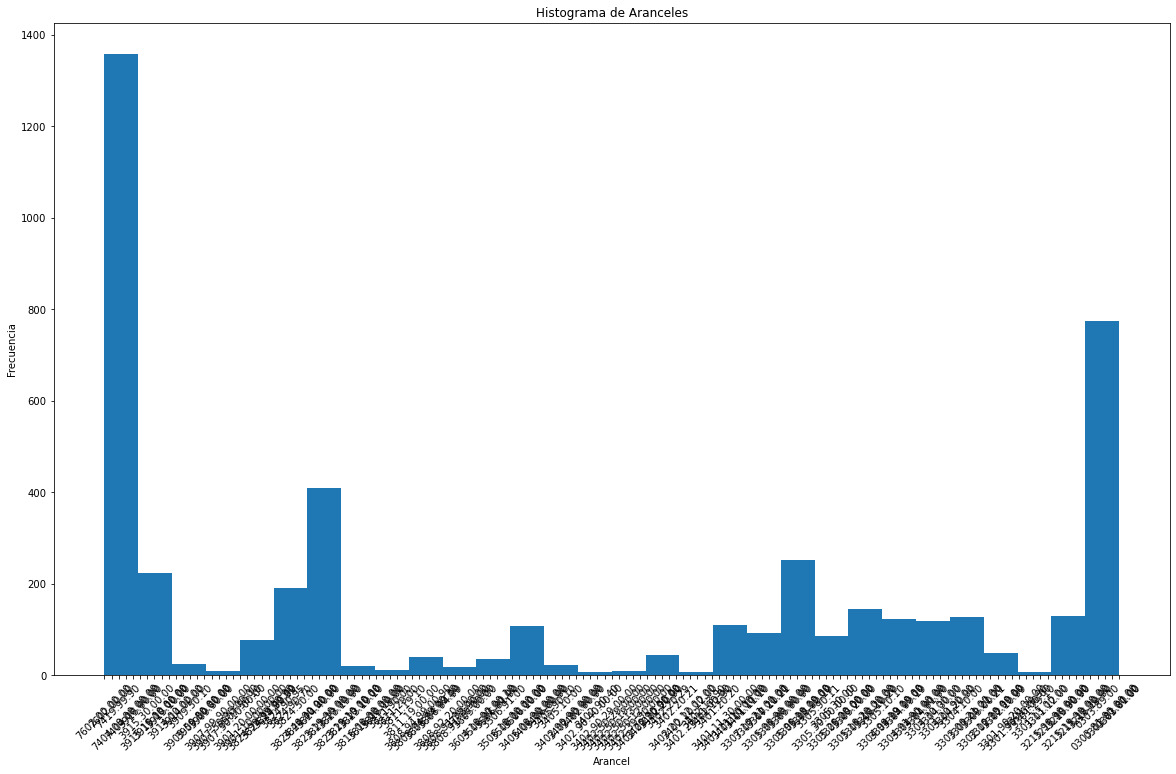

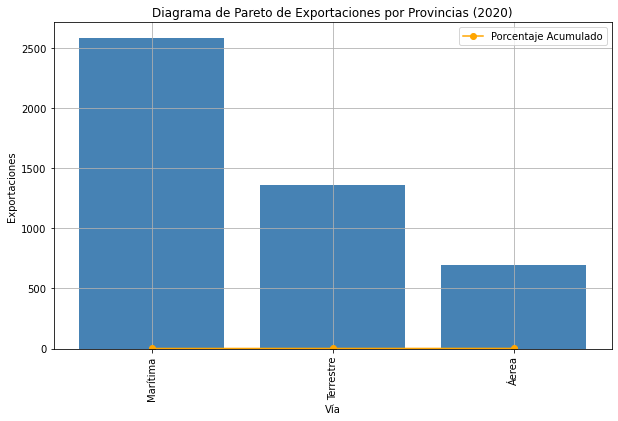

In [82]:
#BD2(Exportaciones por aranceles)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols

df = pd.read_excel("@Exportaciones por aranceles (2).xlsx")

# Seleccionar el rango de filas deseado utilizando iloc
df_2020 = df.iloc[65171:69808].copy()

#Histograma de aranceles
plt.figure(figsize=(20, 12))
plt.hist(df_2020["Arancel"], bins=30)
plt.xlabel("Arancel")
plt.ylabel("Frecuencia")
plt.title("Histograma de Aranceles")
plt.xticks(rotation=45)
plt.show()

#timeline de exortaciones en el 2020
df["Mes"] = pd.Categorical(df["Mes"], ordered=True, categories=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])


#diagrama de pareto de las provincias
provincias_counts = df_2020["Vía"].value_counts().sort_values(ascending=False)
provincias_cumulative_percentage = provincias_counts.cumsum() / provincias_counts.sum()

plt.figure(figsize=(10, 6))
plt.bar(provincias_counts.index, provincias_counts.values, color="steelblue")
plt.plot(provincias_cumulative_percentage, color="orange", marker="o", linestyle="-")
plt.xticks(rotation=90)
plt.xlabel("Vía")
plt.ylabel("Exportaciones")
plt.title("Diagrama de Pareto de Exportaciones por Provincias (2020)")
plt.legend(["Porcentaje Acumulado"])
plt.grid(True)
plt.show()



Media: 208587.90752205253
Varianza: 6499566378109.796
Desviación Estándar: 2549424.7151288455


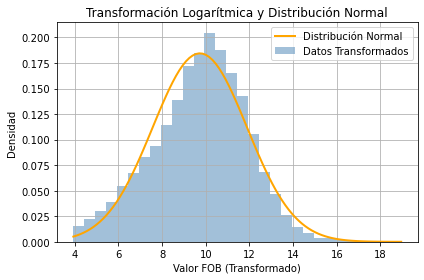

In [83]:
#BD2(Exportaciones por aranceles)
valor_fob = df["Valor FOB"]

media = np.mean(valor_fob)
varianza = np.var(valor_fob)
desviacion_estandar = np.std(valor_fob)

print("Media:", media)
print("Varianza:", varianza)
print("Desviación Estándar:", desviacion_estandar)


# Transformación logarítmica
valor_fob_transformado = np.log(valor_fob)

# Ajuste de la distribución normal
mu, sigma = stats.norm.fit(valor_fob_transformado)

# Crear el histograma con los datos transformados
plt.hist(valor_fob_transformado, bins=30, density=True, alpha=0.5, color="steelblue")

# Crear la línea de la distribución normal
x = np.linspace(valor_fob_transformado.min(), valor_fob_transformado.max(), 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, color="orange", linewidth=2)

# Configuración del gráfico
plt.xlabel("Valor FOB (Transformado)")
plt.ylabel("Densidad")
plt.title("Transformación Logarítmica y Distribución Normal")
plt.legend(["Distribución Normal", "Datos Transformados"])
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


                            OLS Regression Results                            
Dep. Variable:              Valor FOB   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     254.7
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           2.93e-57
Time:                        16:51:17   Log-Likelihood:            -1.3032e+06
No. Observations:               80603   AIC:                         2.607e+06
Df Residuals:                   80601   BIC:                         2.607e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.703e+07   4.84e+06    -15.918      0.0

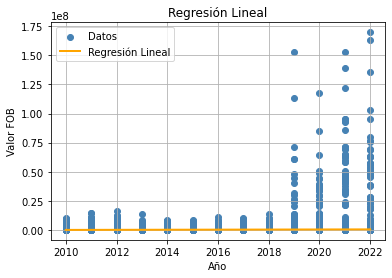

Estadística chi-cuadrado: 5905541.295915275
Valor p: 1.0


In [88]:
#BD2(Exportaciones por aranceles)
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Variable dependiente
y = df["Valor FOB"]

# Variable independiente
X = df[["Año"]]  # Puedes agregar más variables independientes si es necesario

# Agregar una constante a X para incluir el término de intersección en el modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener los resultados y estadísticas del modelo
print(modelo.summary())

# Gráfico de regresión lineal
plt.scatter(df["Año"], df["Valor FOB"], color="steelblue", label="Datos")
plt.plot(df["Año"], modelo.predict(X), color="orange", linewidth=2, label="Regresión Lineal")
plt.xlabel("Año")
plt.ylabel("Valor FOB")
plt.title("Regresión Lineal")
plt.legend()
plt.grid(True)
plt.show()

#prueba estadistica chi cuadrado

contingencia = pd.crosstab(df["Codigopais"], df["Valor FOB"])

chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingencia)

print("Estadística chi-cuadrado:", chi2_statistic)
print("Valor p:", p_value)


In [ ]:
---------------------------------------------------------------------------------------------------------------------------

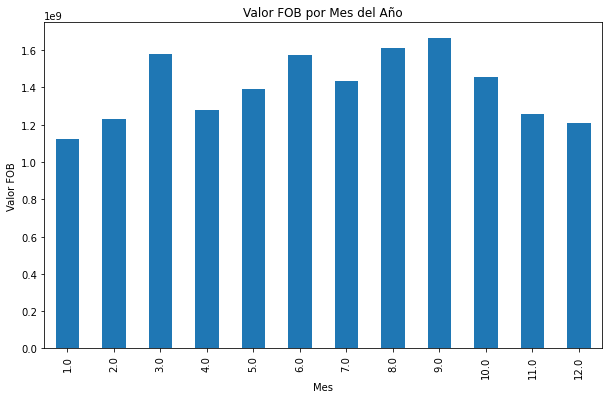

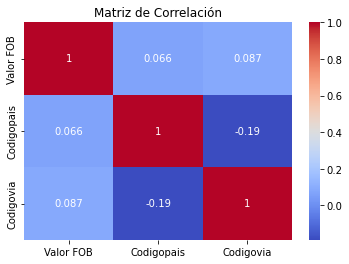

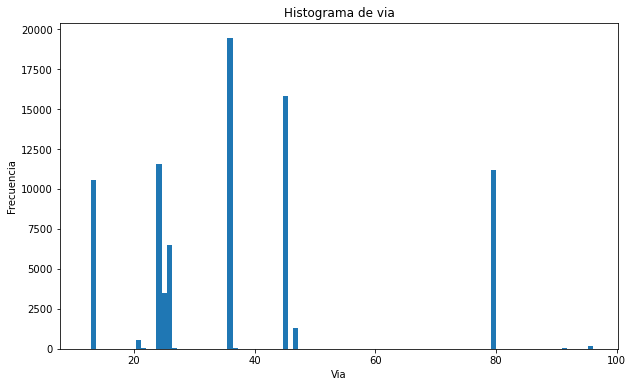

Media: 208463.63011627042
Varianza: 6493959025845.377
Desviación Estándar: 2548324.748897867
Estadístico de Shapiro-Wilk: 0.040498316287994385
Valor p: 0.0
Pendiente: 8.209137155614173e-08
Intercepto: 2015.504504804134
Coeficiente de Correlación: 0.05597180404319003
Valor p: 5.40204232671267e-57
Error estándar: 5.155673883742007e-09


C:\Users\19546\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [98]:
#BD3(Exportaciones por paises)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargar los datos desde un archivo excel
data = pd.read_excel('@Exportaciones por países .xlsx')

# Gráfico de barras para el valor FOB por mes del año
plt.figure(figsize=(10, 6))
monthly_fob = data.groupby(data['MES'])['Valor FOB'].sum()
monthly_fob.plot(kind='bar')
plt.title('Valor FOB por Mes del Año')
plt.xlabel('Mes')
plt.ylabel('Valor FOB')
plt.show()


# Explorar correlaciones entre variables
correlation_matrix = data[['Valor FOB', 'Mes', 'Codigopais', 'Codigovia']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(data['Codigovia'], bins=100)
plt.title('Histograma de via')
plt.xlabel('Via')
plt.ylabel('Frecuencia')
plt.show()

# Media, varianza y desviación estándar
mean_fob = data['Valor FOB'].mean()
var_fob = data['Valor FOB'].var()
std_fob = data['Valor FOB'].std()
print('Media:', mean_fob)
print('Varianza:', var_fob)
print('Desviación Estándar:', std_fob)



Pendiente: 8.209137155614173e-08
Intercepto: 2015.504504804134
Coeficiente de Correlación: 0.05597180404319003
Valor p: 5.40204232671267e-57
Error estándar: 5.155673883742007e-09


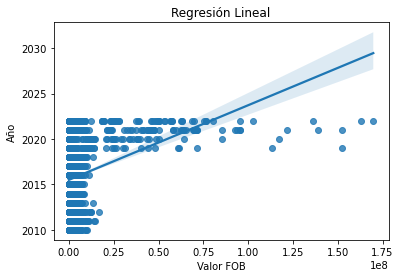

In [99]:
#BD3(Exportaciones por paises)
# Regresión lineal entre el valor FOB y otra variable
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Valor FOB'], data['Año'])
print('Pendiente:', slope)
print('Intercepto:', intercept)
print('Coeficiente de Correlación:', r_value)
print('Valor p:', p_value)
print('Error estándar:', std_err)

# Realizar un gráfico de dispersión con una línea de regresión lineal
sns.regplot(x='Valor FOB', y='Año', data=data)
plt.title('Regresión Lineal')
plt.xlabel('Valor FOB')
plt.ylabel('Año')
plt.show()


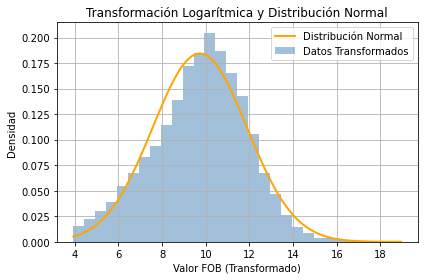

Estadístico Chi cuadrado: 7797.760578000269
Valor p: 4.755854653232651e-34
Estadístico t: nan
Valor p: nan


In [103]:
#BD3(Exportaciones por paises)
import pandas as pd
from scipy.stats import chi2_contingency

data=data.dropna()

# Transformación logarítmica
valor_fob_transformado = np.log(data['Valor FOB'])

# Ajuste de la distribución normal
mu, sigma = stats.norm.fit(valor_fob_transformado)

# Crear el histograma con los datos transformados
plt.hist(valor_fob_transformado, bins=30, density=True, alpha=0.5, color="steelblue")

# Crear la línea de la distribución normal
x = np.linspace(valor_fob_transformado.min(), valor_fob_transformado.max(), 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, color="orange", linewidth=2)

# Configuración del gráfico
plt.xlabel("Valor FOB (Transformado)")
plt.ylabel("Densidad")
plt.title("Transformación Logarítmica y Distribución Normal")
plt.legend(["Distribución Normal", "Datos Transformados"])
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Realizar la prueba de chi cuadrado
observed = pd.crosstab(data['Mes'], [data['Codigopais'], data['Codigovia']])
chi2_statistic, p_value, _, _ = chi2_contingency(observed)

print('Estadístico Chi cuadrado:', chi2_statistic)
print('Valor p:', p_value)

# Dividir los datos en dos grupos según los valores de 'Codigopais'
group1 = data[data['Codigopais'] == 'Grupo1']['Valor FOB'].values
group2 = data[data['Codigopais'] == 'Grupo2']['Valor FOB'].values

# Realizar la prueba t
t_statistic, p_value = ttest_ind(group1, group2)

print('Estadístico t:', t_statistic)
print('Valor p:', p_value)